# Breast Cancer Diagnosis — Logistic Regression from Scratch

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Load Data

In [2]:
data_df = pd.read_csv("data.csv")
data_df = data_df.drop(columns="Unnamed: 32")
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Overview and Cleaning

In [3]:
print("Data Shape:", data_df.shape)
print("Missing Values:\n", data_df.isnull().sum())

Data Shape: (569, 32)
Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## Diagnosis Count Plot

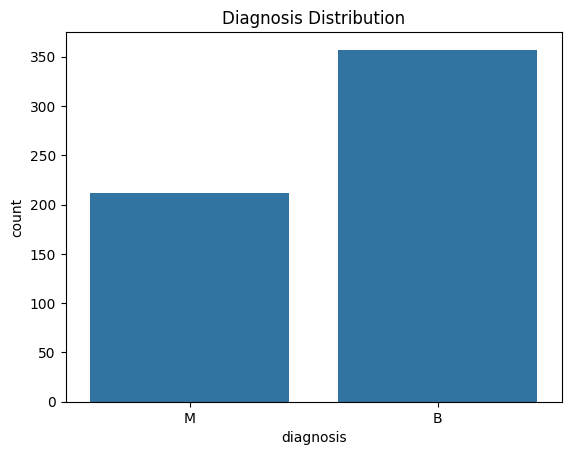

In [4]:
sns.countplot(x='diagnosis', data=data_df)
plt.title("Diagnosis Distribution")
plt.show()

In [5]:
data_df["diagnosis"] = data_df["diagnosis"].map({"M": 1, "B": 0})

## Correlation Heatmap

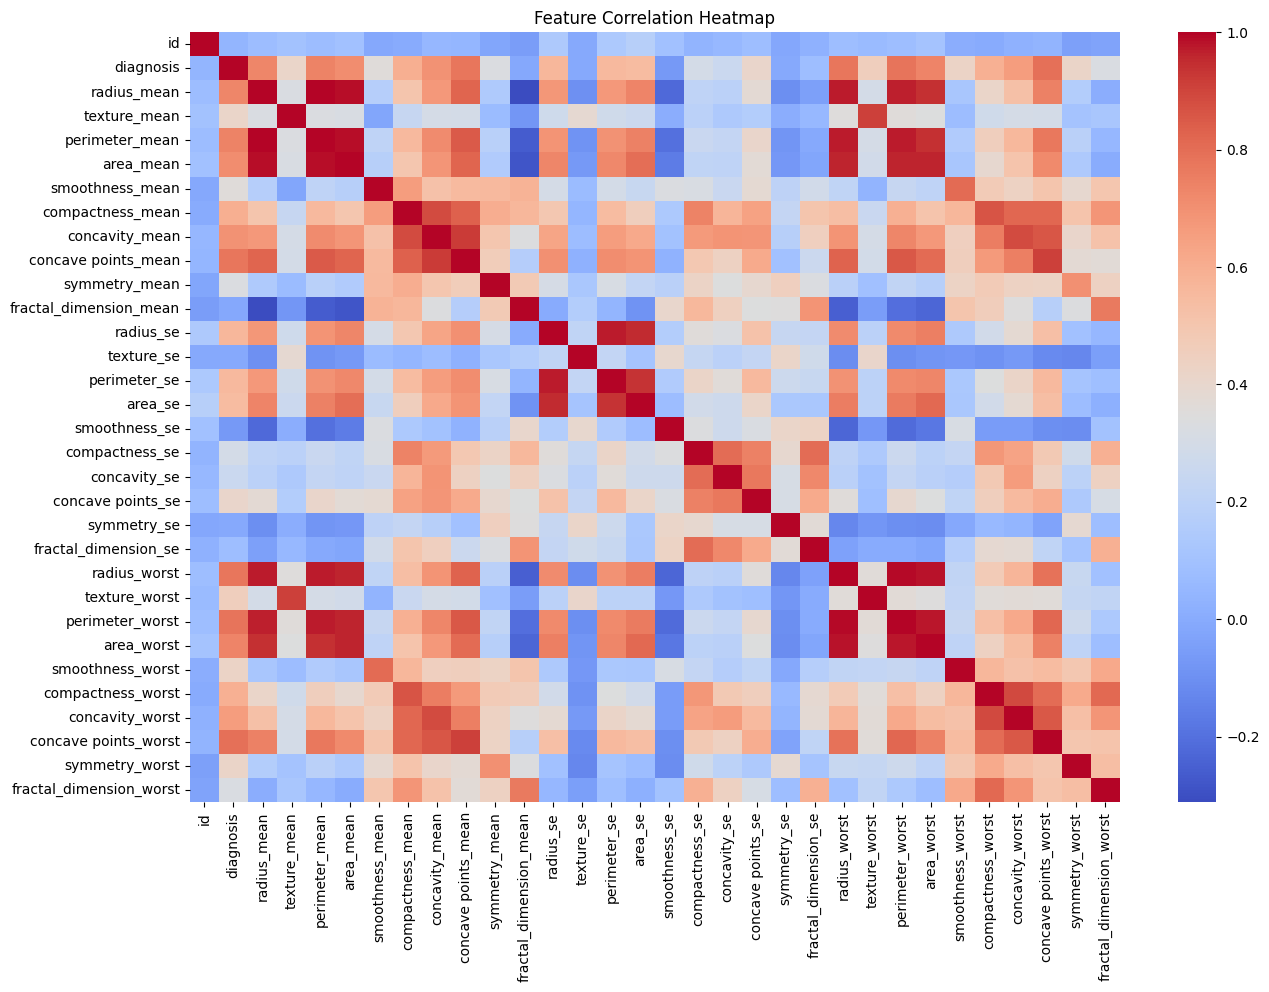

In [6]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_df.select_dtypes(include="number").corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

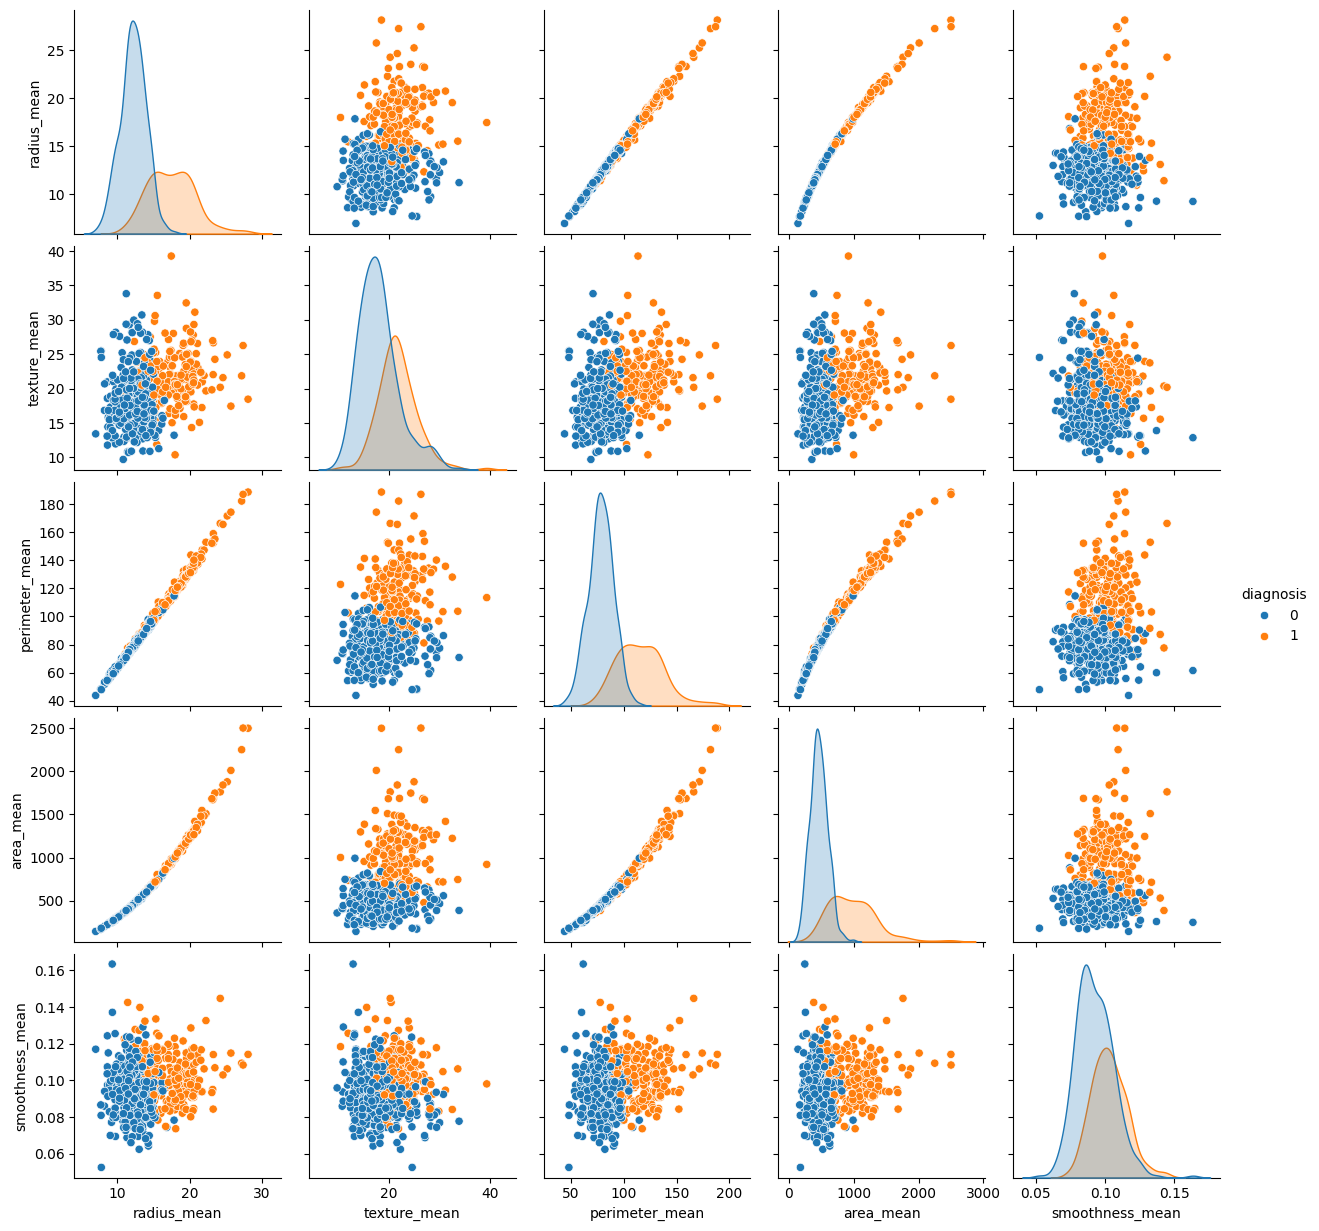

In [7]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
sns.pairplot(data_df[selected_features], hue='diagnosis')
plt.show()

In [8]:
data_df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Prepare Data for Training

In [9]:
inputs = data_df.drop(columns=["id", "diagnosis"]).to_numpy()
y = data_df["diagnosis"].to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(inputs)

## Define Cost Function and Gradient Descent Function

In [10]:
def compute_cost(x, y, w, b):
    """
    Compute the logistic regression cost function.
    """
    z = np.dot(x, w) + b
    f_x = 1 / (1 + np.exp(-z))
    m = x.shape[0]
    epsilon = 1e-15
    cost = -(1/m) * np.sum(y * np.log(f_x + epsilon) + (1 - y) * np.log(1 - f_x + epsilon))
    return cost

def compute_gradient(x, y, w, b, alpha, epochs):
    """
    Perform gradient descent to optimize weights and bias.
    """
    cost_history = []
    m = x.shape[0]
    for i in range(epochs):
        z = np.dot(x, w) + b
        f_x = 1 / (1 + np.exp(-z))
        dj_dw = (1/m) * np.dot(x.T, (f_x - y))
        dj_db = (1/m) * np.sum(f_x - y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)
    return w, b, cost_history

## Training the Model

In [11]:
w_init = np.zeros(X_scaled.shape[1])
b_init = 0.0
alpha = 0.1
epochs = 1500
w_final, b_final, cost_history = compute_gradient(X_scaled, y, w_init, b_init, alpha, epochs)

## Plotting Cost over Epochs

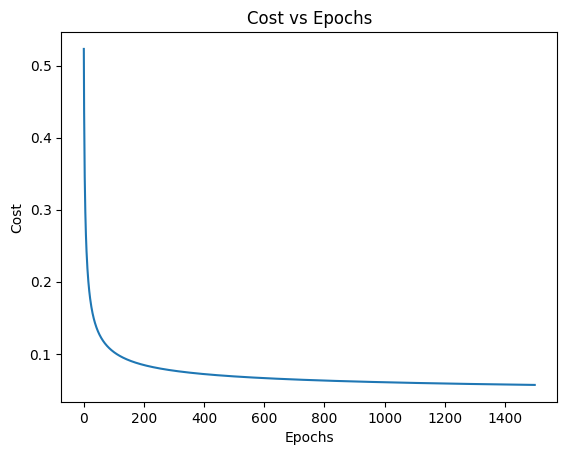

In [12]:
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost vs Epochs")
plt.show()

## Prediction Function

In [13]:
def predict(x, w, b):
    """
    Predict class labels for given input features.
    """
    z = np.dot(x, w) + b
    f_x = 1 / (1 + np.exp(-z))
    return np.where(f_x >= 0.5, 1, 0)

## Evaluate Accuracy

In [14]:
y_pred = predict(X_scaled, w_final, b_final)
accuracy = np.mean(y_pred == y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 98.77%


## User Input for Prediction

In [15]:
print("\n🔍 Breast Cancer Prediction Based on 30 Features")

try:
    user_input = input("Enter 30 feature values separated by space:\n")
    user_values = [float(val) for val in user_input.strip().split() if val.strip() != '']
    
    if len(user_values) != 30:
        raise ValueError(f"You entered {len(user_values)} values. Please enter exactly 30.")

    user_array = np.array(user_values).reshape(1, -1)
    user_scaled = scaler.transform(user_array)
    prediction = predict(user_scaled, w_final, b_final)

    print("\n🩺 Diagnosis Prediction:", "Malignant (Cancer)" if prediction[0] == 1 else "Benign (No Cancer)")

except ValueError as ve:
    print("\n❌ Error:", ve)
except Exception:
    print("\n❌ Invalid input. Please ensure you enter exactly 30 numeric values.")



🔍 Breast Cancer Prediction Based on 30 Features


Enter 30 feature values separated by space:
 17.99 10.38 122.8 1001.0 0.1184 0.2776 0.3001 0.1471 0.2419 0.07871 1.095 0.9053 8.589 153.4 0.006399 0.04904 0.05373 0.01587 0.03003 0.006193 25.38 17.33 184.6 2019.0 0.1622 0.6656 0.7119 0.2654 0.4601 0.1189



🩺 Diagnosis Prediction: Malignant (Cancer)
